# Ad Sales Data
# Revenue Regression
Code link: https://www.kaggle.com/code/akshaysunil07/ad-tech-revenue-regression/notebook 

# Installing packages section

In [ ]:
# Installing packages set for without init script
!pip install --upgrade pip
!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0 fosforio fosforml numpy pandas matplotlib scikit-learn xgboost seaborn python-dateutil tqdm holidays faker
!pip install --upgrade --q snowflake-snowpark-python==1.9.0
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

In [9]:
!pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 192.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 297.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 291.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 317.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 660.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 310.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fosforio 1.0.1 requires pandas==2.0.0, but you have pandas 2.0.3 which is incompatible.
mlflow 2.10.0 requires packaging<24, but you have packaging 24.1 which is incomp

In [ ]:
# pre run in template init script

! pip install "snowflake-connector-python[pandas]"
! sudo pip install snowflake-ml-python==1.0.11 -U
! pip install --upgrade snowflake-snowpark-python==1.9.0
!pip install --q seaborn
!pip install --q plotly 
! pip install --upgrade xgboost==1.7.3
! pip install --upgrade numpy==1.24.3
! pip install --upgrade pandas==1.5.3
! pip install --upgrade anyio==3.5.0
! pip install --upgrade packaging==23.1
! pip install --upgrade scikit-learn==1.3.0
! pip install --upgrade typing-extensions==4.7.1
! pip install --upgrade cryptography==39.0.0
! pip install --upgrade fsspec==2023.9.2
! pip install statsmodels
! pip install xgboost
! pip install catboost

In [ ]:
#Run from here
! pip install fosforio
! pip install fosforml

In [ ]:
#new set after pre init script

!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0  matplotlib python-dateutil tqdm faker
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

# Restart and clear outputs

# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary cache directory at /tmp/matplotlib-iijz3ucy because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from fosforio import snowflake
from fosforml import *
from fosforml.constants import MLModelFlavours
from fosforio import get_dataframe
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import warnings; warnings.simplefilter('ignore')
from joblib import dump, load
import requests
from tqdm import tqdm
import time
import calendar

from time import sleep
import configparser
from dateutil.relativedelta import relativedelta
import datetime
from dateutil.easter import easter
from scipy.optimize import minimize_scalar
from scipy.optimize import curve_fit

%matplotlib inline

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


In [ ]:
#df1 = pd.read_csv('C:/Users/10738686/Downloads/ad_sales_data/ad_sales.csv')
#df = df1.sample(n=50000,random_state=10).reset_index(drop=True)

In [ ]:
# Importing data from snowflake

In [3]:
# snowflake.get_connection(connection_name="ME_AD_SALES_CXN")

from fosforio import snowflake
from fosforio import get_dataframe

snowflake.get_connection(connection_name="ME_AD_SALES_CXN")

Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7f5da091b640>
Please close the connection after use!


In [4]:
df = get_dataframe("AD_SALES_IMP")
df_all = get_dataframe("AD_TECH_INPUT")


Reading dataframe from snowflake native connector
Reading dataframe from snowflake native connector


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DATE                     567291 non-null  object 
 1   SITE_ID                  567291 non-null  int16  
 2   AD_TYPE_ID               567291 non-null  int8   
 3   GEO_ID                   567291 non-null  int16  
 4   DEVICE_CATEGORY_ID       567291 non-null  int8   
 5   ADVERTISER_ID            567291 non-null  int16  
 6   ORDER_ID                 567291 non-null  int16  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int8   
 8   OS_ID                    567291 non-null  int8   
 9   INTEGRATION_TYPE_ID      567291 non-null  int8   
 10  MONETIZATION_CHANNEL_ID  567291 non-null  int8   
 11  AD_UNIT_ID               567291 non-null  int16  
 12  TOTAL_IMPRESSIONS        567291 non-null  int16  
 13  TOTAL_REVENUE            567291 non-null  float64
 14  VIEW

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AD_DATE                  567291 non-null  object 
 1   SITE_ID                  567291 non-null  int16  
 2   AD_TYPE_ID               567291 non-null  int8   
 3   GEO_ID                   567291 non-null  int16  
 4   DEVICE_CATEGORY_ID       567291 non-null  int8   
 5   ADVERTISER_ID            567291 non-null  int16  
 6   ORDER_ID                 567291 non-null  int16  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int8   
 8   OS_ID                    567291 non-null  int8   
 9   MONETIZATION_CHANNEL_ID  567291 non-null  int8   
 10  AD_UNIT_ID               567291 non-null  int16  
 11  TOTAL_IMPRESSIONS        567291 non-null  int16  
 12  TOTAL_REVENUE            567291 non-null  float64
 13  VIEWABLE_IMPRESSIONS     567291 non-null  int16  
 14  MEAS

In [7]:
df.columns = df.columns.str.lower()
df_all.columns = df_all.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int16  
 2   ad_type_id               567291 non-null  int8   
 3   geo_id                   567291 non-null  int16  
 4   device_category_id       567291 non-null  int8   
 5   advertiser_id            567291 non-null  int16  
 6   order_id                 567291 non-null  int16  
 7   line_item_type_id        567291 non-null  int8   
 8   os_id                    567291 non-null  int8   
 9   integration_type_id      567291 non-null  int8   
 10  monetization_channel_id  567291 non-null  int8   
 11  ad_unit_id               567291 non-null  int16  
 12  total_impressions        567291 non-null  int16  
 13  total_revenue            567291 non-null  float64
 14  view

In [ ]:
# from fosforio import snowflake

# df1 = snowflake.get_dataframe("ME_AD_SALES_SCHEMA.AD_SALES_IMP")
# df1 = get_dataframe("AD_SALES_IMP")
# df1

# Exploratory data analysis

In [8]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
num_col=list(df.select_dtypes(np.number).columns)

In [10]:
import seaborn as sns

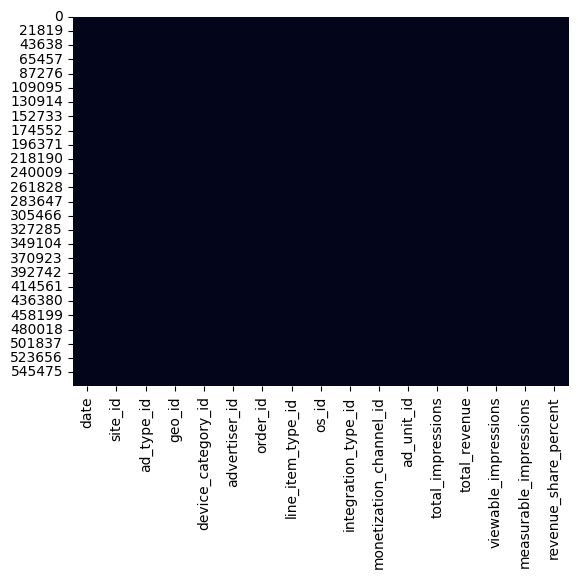

In [11]:
sns.heatmap(df.isnull(),cbar=False,cbar_kws={'color':'r'})
plt.show()

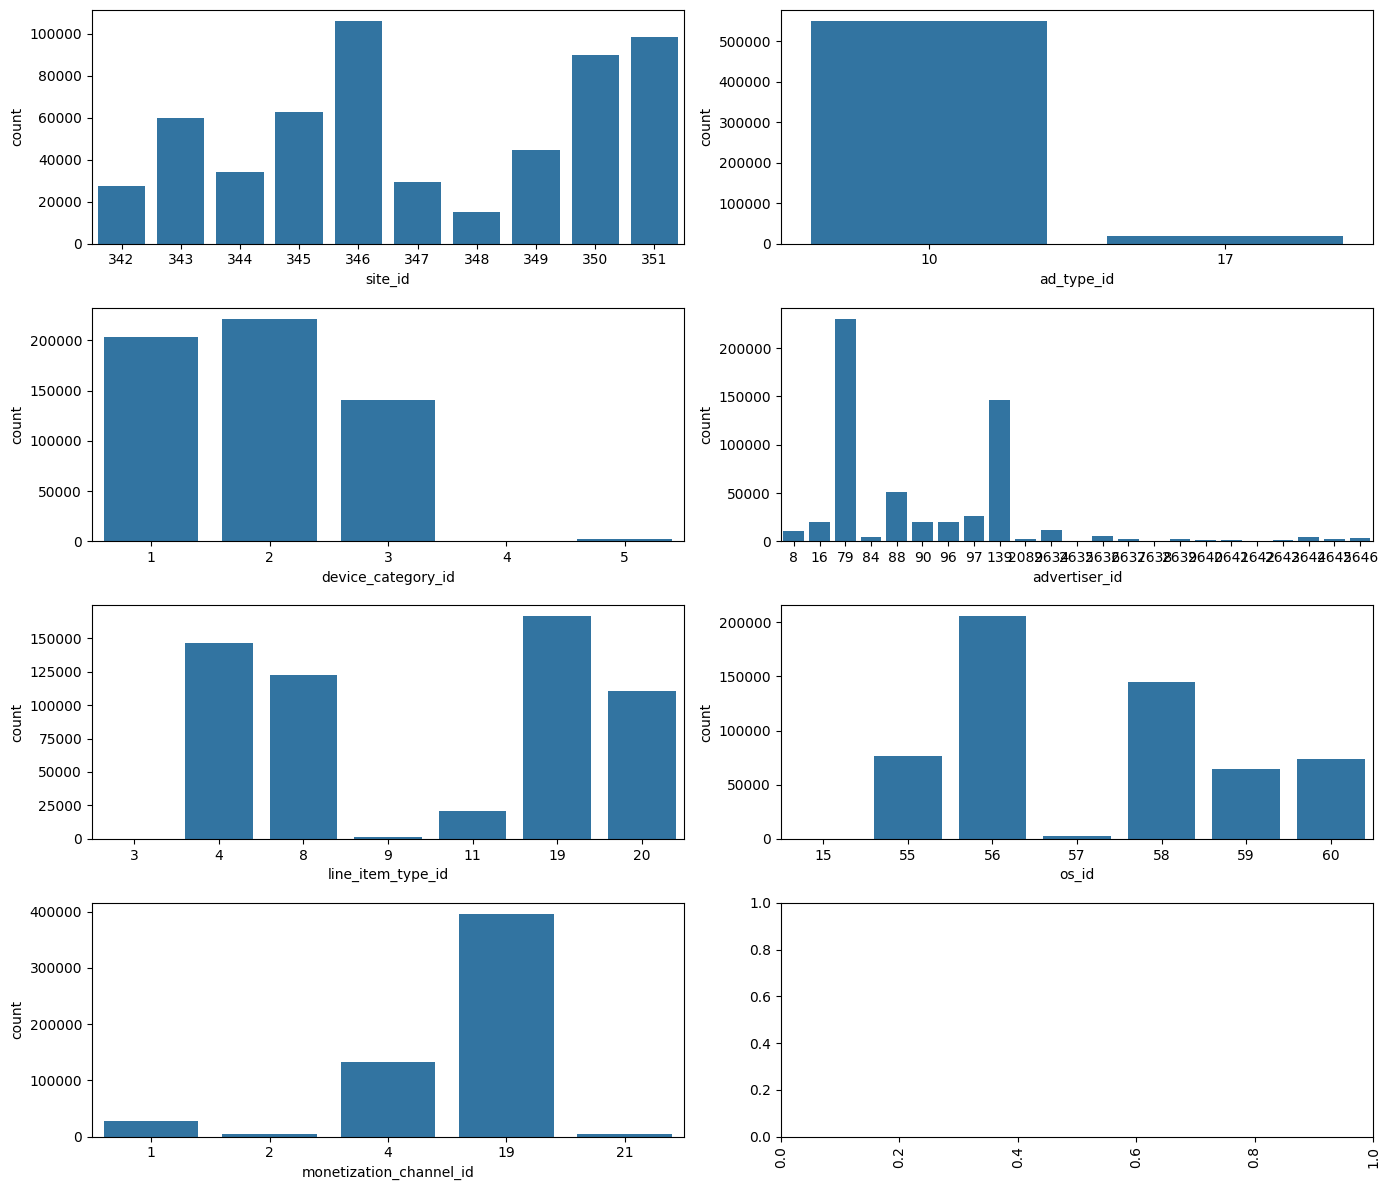

In [12]:
fig, ax = plt.subplots(4,2, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i,col in enumerate(scat_col):
    sns.countplot(data=df,x=col,ax=axes_[i])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.tight_layout()

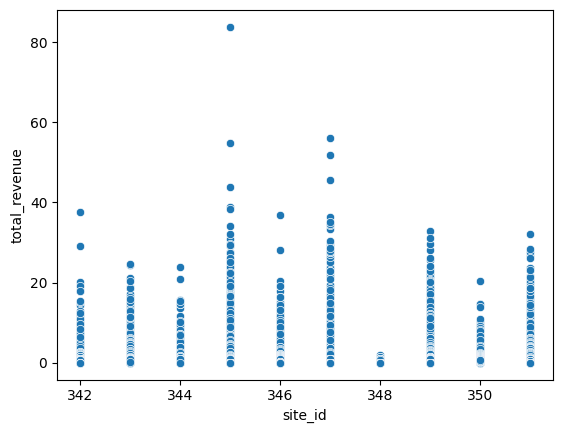

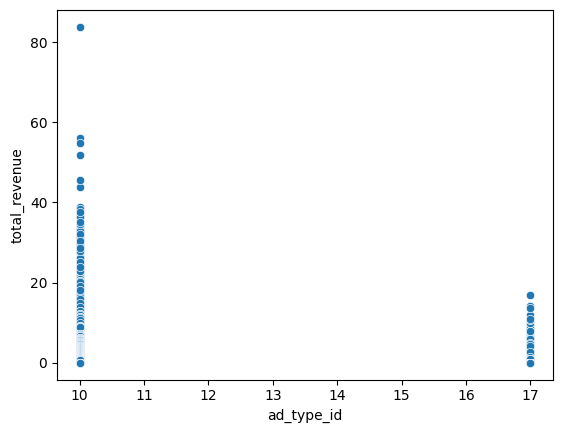

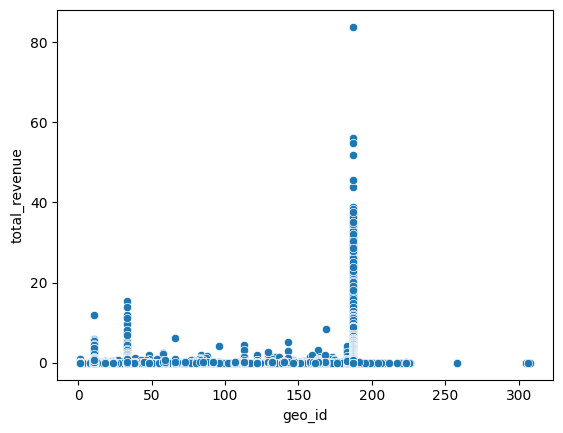

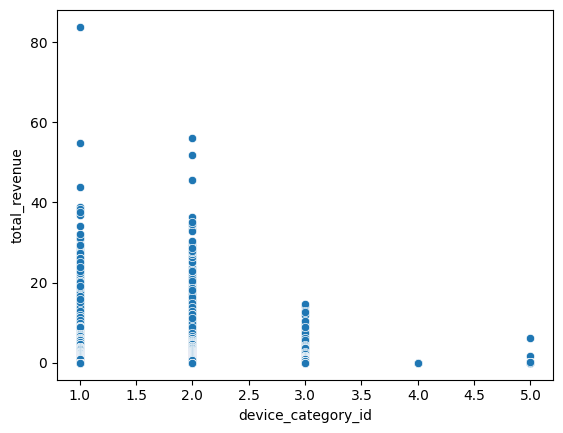

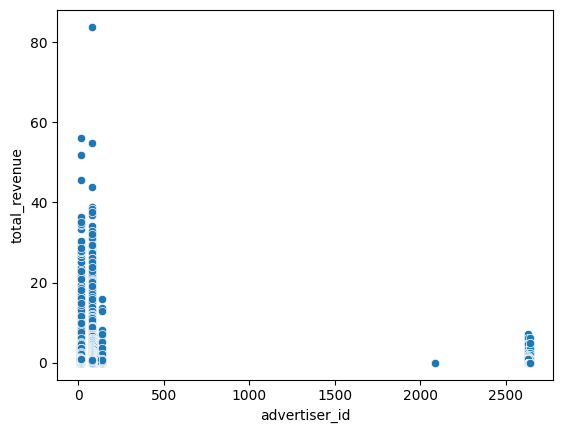

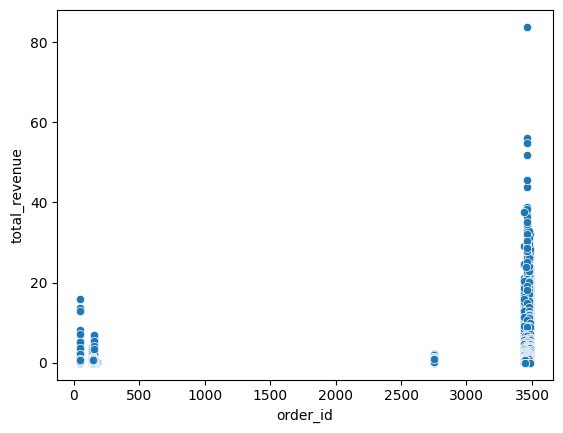

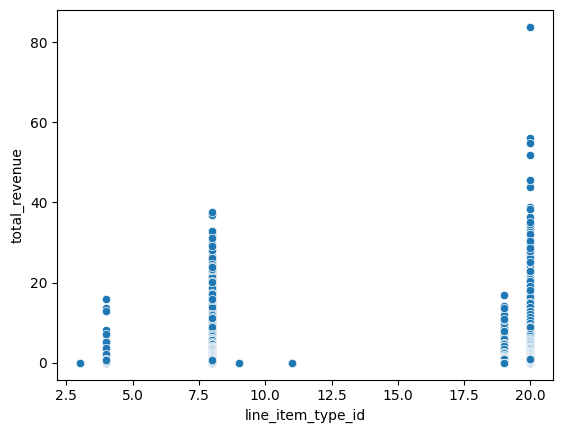

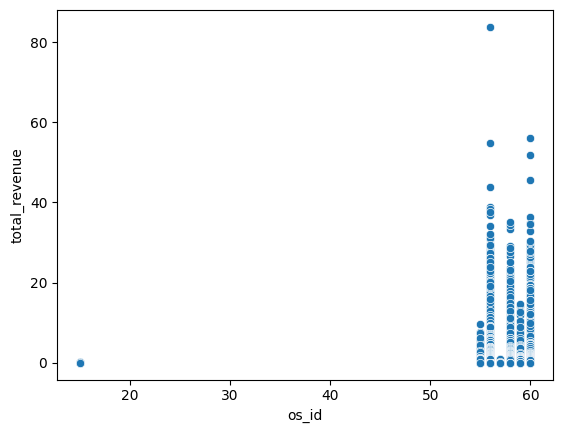

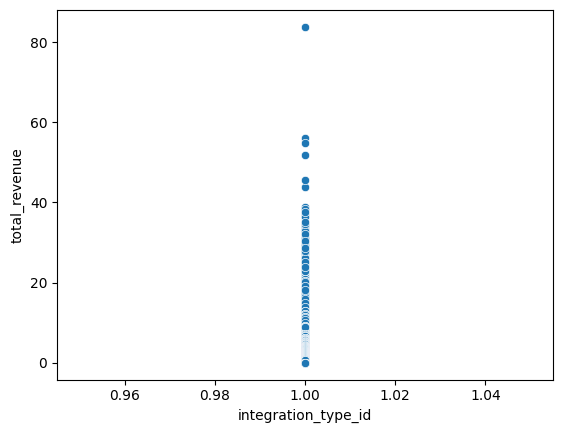

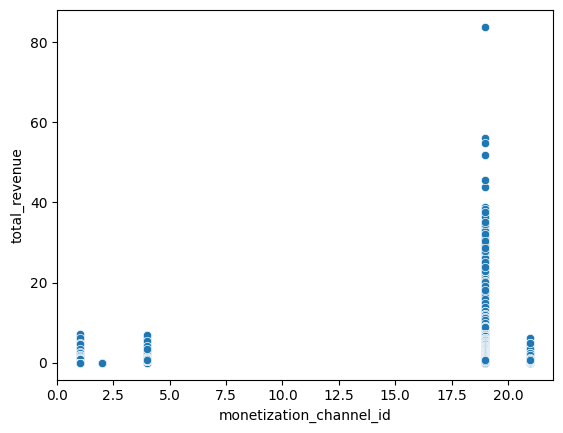

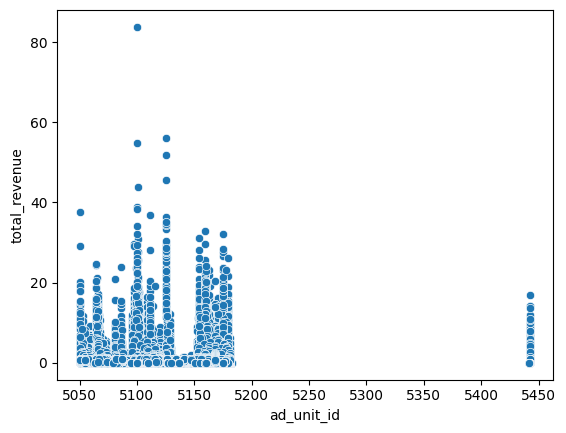

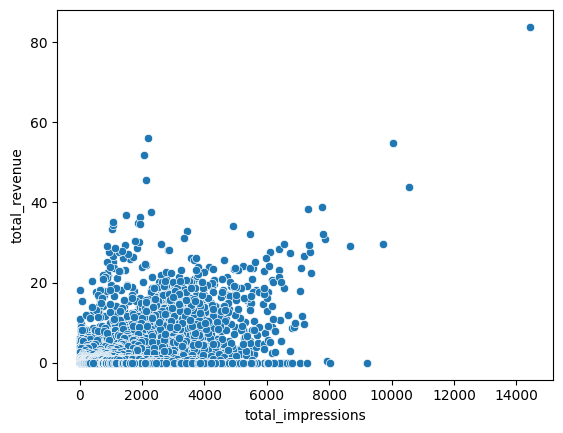

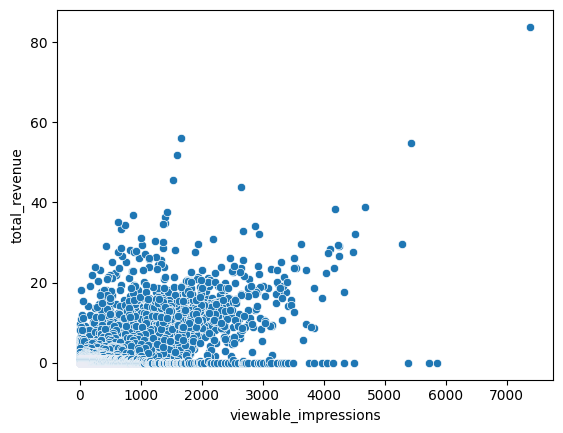

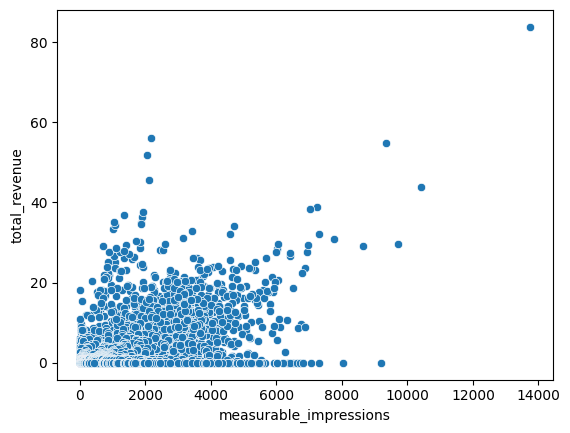

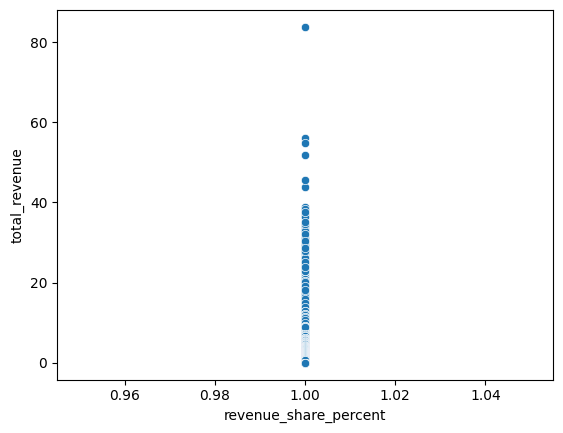

In [13]:
for i in num_col:
    if i!='total_revenue':
        sns.scatterplot(data=df,x=i,y='total_revenue')
        plt.show()

In [15]:
df.max()

date                       30-06-2024 00:00
site_id                                 351
ad_type_id                               17
geo_id                                  308
device_category_id                        5
advertiser_id                          2646
order_id                               3489
line_item_type_id                        20
os_id                                    60
integration_type_id                       1
monetization_channel_id                  21
ad_unit_id                             5443
total_impressions                     14452
total_revenue                        83.822
viewable_impressions                   7392
measurable_impressions                13756
revenue_share_percent                     1
dtype: object

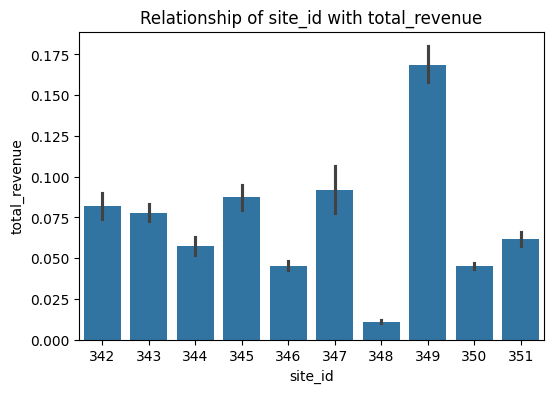

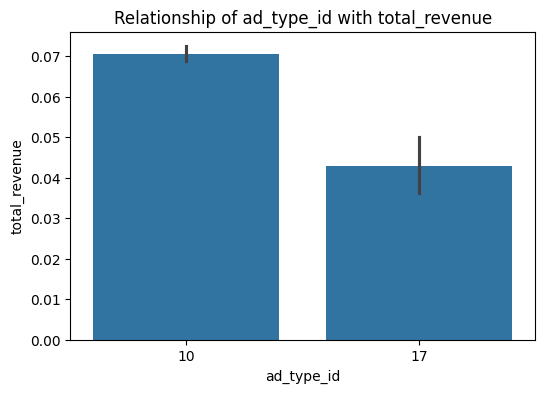

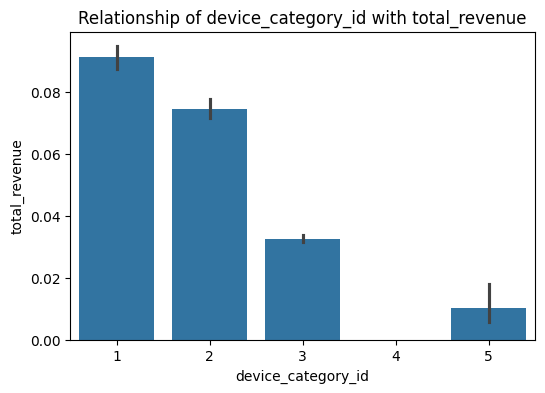

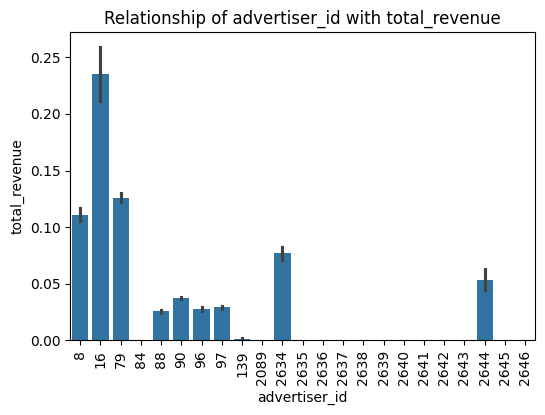

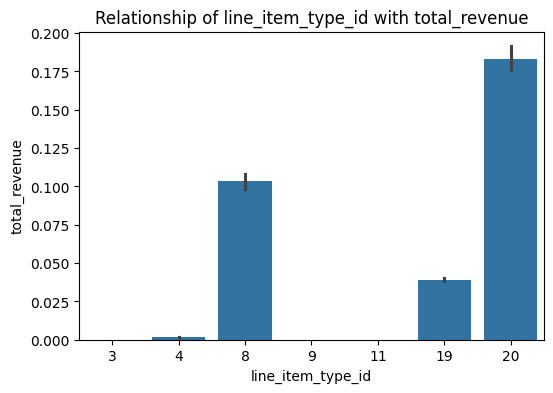

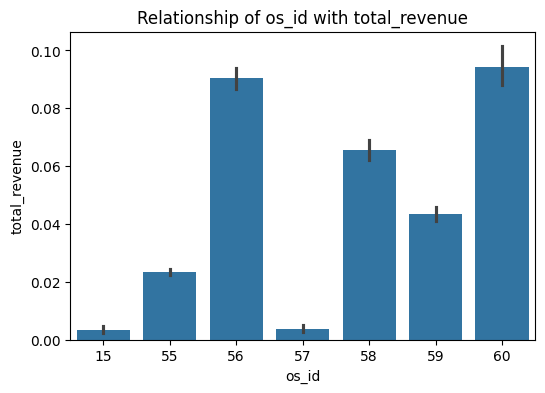

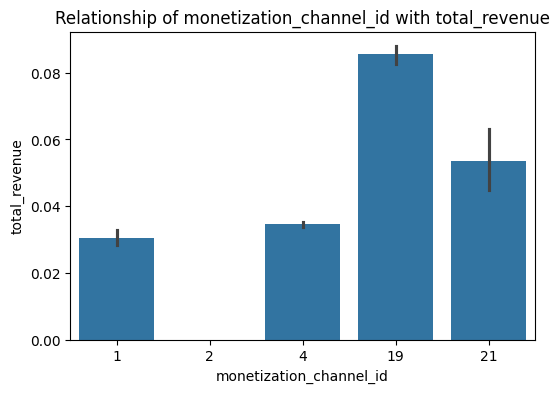

In [16]:
for col in (scat_col):
    title='Relationship of '+col+' with total_revenue'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df['total_revenue'],x=df[col])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

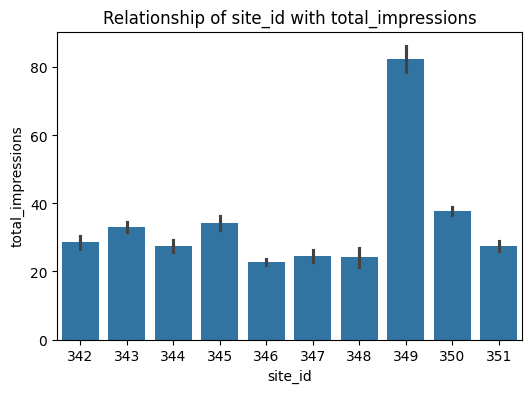

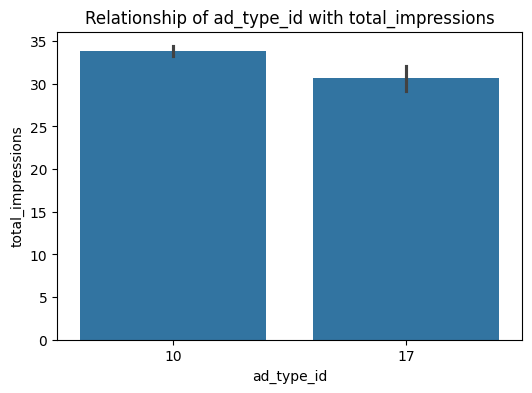

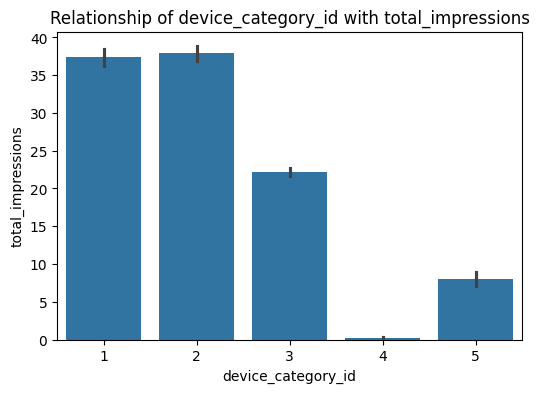

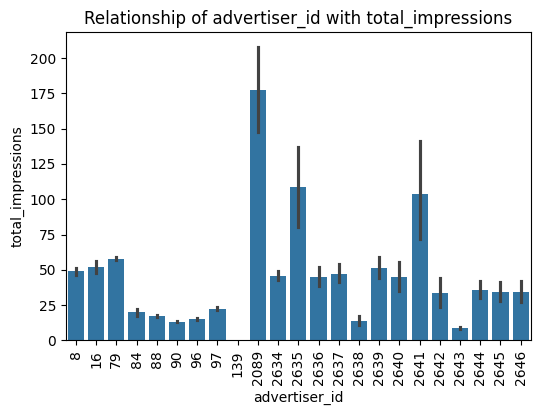

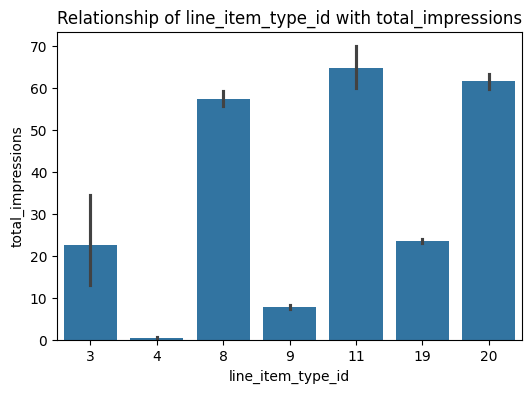

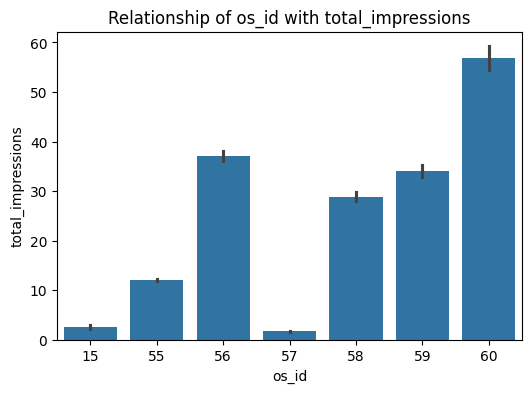

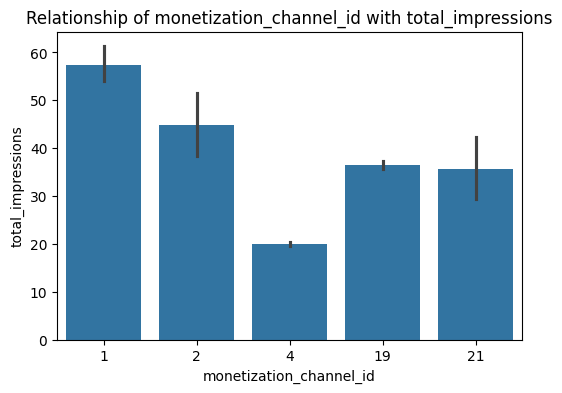

In [17]:
for col in (scat_col):
    title='Relationship of '+ col +' with total_impressions'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df['total_impressions'],x=df[col],)
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [18]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

for i in cat_col:
    df[i]=df[i].astype('object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  object 
 2   ad_type_id               567291 non-null  object 
 3   geo_id                   567291 non-null  object 
 4   device_category_id       567291 non-null  object 
 5   advertiser_id            567291 non-null  object 
 6   order_id                 567291 non-null  object 
 7   line_item_type_id        567291 non-null  object 
 8   os_id                    567291 non-null  object 
 9   integration_type_id      567291 non-null  int8   
 10  monetization_channel_id  567291 non-null  object 
 11  ad_unit_id               567291 non-null  int16  
 12  total_impressions        567291 non-null  int16  
 13  total_revenue            567291 non-null  float64
 14  view

In [20]:
df.drop(['ad_unit_id','revenue_share_percent','integration_type_id'],axis=1,inplace=True)
df.drop(['ad_type_id','site_id','advertiser_id'],axis=1,inplace=True)
df.drop(['date','geo_id','order_id'],axis=1,inplace=True)

In [21]:
df.select_dtypes(object)

,device_category_id,line_item_type_id,os_id,monetization_channel_id
0,2,19,58,4
1,2,19,60,4
2,2,19,58,4
3,3,20,59,19
4,3,20,59,19
...,...,...,...,...
567286,1,11,56,1
567287,1,11,56,1
567288,1,11,56,1
567289,2,11,60,1


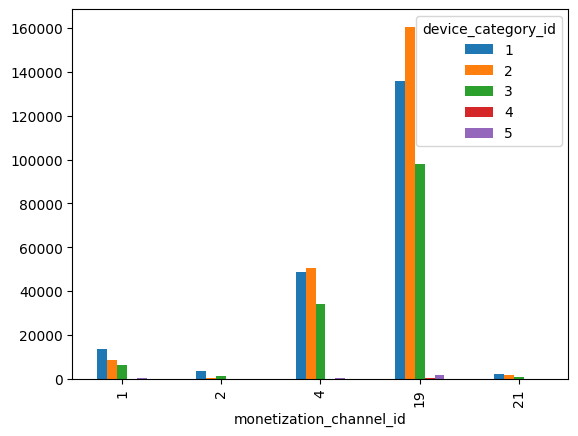

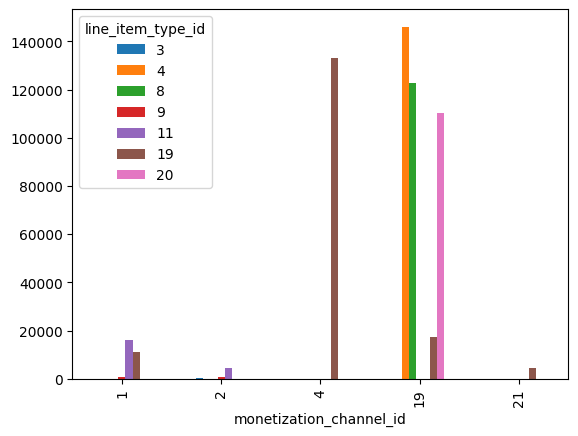

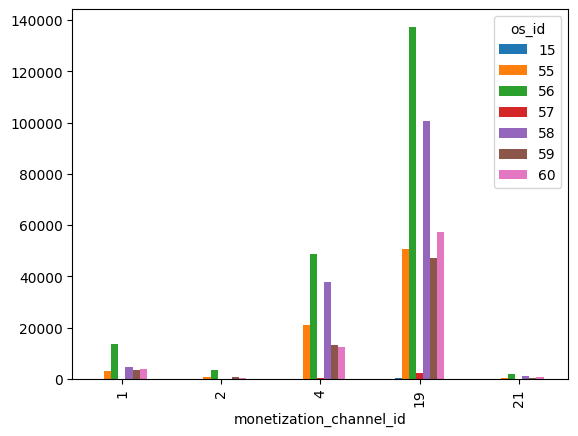

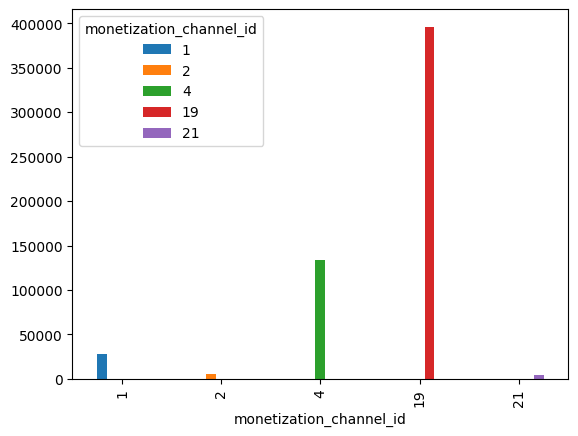

In [22]:
for i in df.select_dtypes(object).columns:
    pd.crosstab(df['monetization_channel_id'],df[i]).plot(kind='bar')
    plt.show()

# Predictive Modelling

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   device_category_id       567291 non-null  object 
 1   line_item_type_id        567291 non-null  object 
 2   os_id                    567291 non-null  object 
 3   monetization_channel_id  567291 non-null  object 
 4   total_impressions        567291 non-null  int16  
 5   total_revenue            567291 non-null  float64
 6   viewable_impressions     567291 non-null  int16  
 7   measurable_impressions   567291 non-null  int16  
dtypes: float64(1), int16(3), object(4)
memory usage: 24.9+ MB


In [24]:
Xd = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [25]:
X=pd.get_dummies(Xd,drop_first=True)

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   total_impressions           567291 non-null  float64
 1   viewable_impressions        567291 non-null  float64
 2   measurable_impressions      567291 non-null  float64
 3   device_category_id_2        567291 non-null  bool   
 4   device_category_id_3        567291 non-null  bool   
 5   device_category_id_4        567291 non-null  bool   
 6   device_category_id_5        567291 non-null  bool   
 7   line_item_type_id_4         567291 non-null  bool   
 8   line_item_type_id_8         567291 non-null  bool   
 9   line_item_type_id_9         567291 non-null  bool   
 10  line_item_type_id_11        567291 non-null  bool   
 11  line_item_type_id_19        567291 non-null  bool   
 12  line_item_type_id_20        567291 non-null  bool   
 13  os_id_55      

In [26]:
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [29]:
X[pc_col]=pd.DataFrame(ss.fit_transform(X[pc_col]),columns=[pc_col])

In [111]:
X

,total_impressions,viewable_impressions,measurable_impressions,device_category_id_2,device_category_id_3,device_category_id_4,device_category_id_5,line_item_type_id_4,line_item_type_id_8,line_item_type_id_9,line_item_type_id_11,line_item_type_id_19,line_item_type_id_20,os_id_55,os_id_56,os_id_57,os_id_58,os_id_59,os_id_60,monetization_channel_id_2,monetization_channel_id_4,monetization_channel_id_19,monetization_channel_id_21
0,-0.125297,-0.125879,-0.126283,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
1,-0.134352,-0.125879,-0.135941,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
2,-0.134352,-0.125879,-0.135941,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
3,-0.134352,-0.125879,-0.135941,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
4,-0.143407,-0.125879,-0.145598,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,30.599319,42.427691,32.621763,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
567287,30.336715,43.976876,32.341700,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
567288,30.735148,52.742519,32.776281,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
567289,36.177381,56.036989,38.590001,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
# Applying PCA (principal component analysis)

In [31]:
from sklearn.decomposition import PCA
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']
pca = PCA()
pca.fit(X[pc_col])

PCA()

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94556992, 0.99831945, 1.        ])

In [33]:
pca = PCA(n_components=1)
cc = pca.fit_transform(X_train[pc_col])
cd = pca.transform(X_test[pc_col])

In [34]:
X_train['PC']=cc
X_test['PC']=cd

In [39]:
X_train

,device_category_id_2,device_category_id_3,device_category_id_4,device_category_id_5,line_item_type_id_4,line_item_type_id_8,line_item_type_id_9,line_item_type_id_11,line_item_type_id_19,line_item_type_id_20,os_id_55,os_id_56,os_id_57,os_id_58,os_id_59,os_id_60,monetization_channel_id_2,monetization_channel_id_4,monetization_channel_id_19,monetization_channel_id_21,PC
250056,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,-0.239439
415671,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,-0.217552
319747,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,-0.239439
488332,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,-0.184790
503367,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,-0.162903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458492,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,-0.195665
107578,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450
120705,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450
377541,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,-0.228563


In [36]:
X_train.drop(pc_col,axis=1,inplace=True)
X_test.drop(pc_col,axis=1,inplace=True)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [42]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)

print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.5805117779146094
Root Mean Squared Error: 0.45780595177030314
Mean Absolute Percentage Error: 97841215610898.97


Test
R2 Score: 0.548997536955701
Root Mean Squared Error: 0.49698103273548255
Mean Absolute Percentage Error: 101457935643598.44


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.945928118278104
RMSE Train: 0.16436422274179505


Test

r2 Test 0.6229653886538502
RMSE Train: 0.45440276699487847


In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [46]:
rfrbest1 = {'max_depth': 12,
 'max_features': 8,
 'min_samples_leaf': 3,
 'n_estimators': 160}

In [47]:
rfr = RandomForestRegressor(**rfrbest1)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.8026777272233534
RMSE Train: 0.3139855076268427


Test

r2 Test 0.6743485740332941
RMSE Train: 0.4223056087869248


In [ ]:
# rfr = RandomForestRegressor() 
#param_dist = {'n_estimators':sp_randint(25,250), 'max_features':sp_randint(1,24), 'max_depth':sp_randint(2,15), 
#                                                                'min_samples_leaf':sp_randint(1,50)} rsearch = RandomizedSearchCV(rfr,param_distributions=param_dist,scoring='r2', 
#                                                                  n_iter=10,cv=3,n_jobs=-1,random_state=4) rsearch.fit(X_train,y_train) rsearch.best_params_

In [48]:
rfrbest2 = {'max_depth': 12,
 'max_features': 15,
 'min_samples_leaf': 6,
 'n_estimators': 154}

In [49]:
rfr = RandomForestRegressor(**rfrbest2)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.7780562652774441
RMSE Train: 0.33299904922688467


Test

r2 Test 0.6676891500040611
RMSE Train: 0.4266017356027677


In [50]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr = RandomForestRegressor()

param_dist = {'n_estimators':np.arange(50,250,50), 'max_features':np.arange(1,21,4), 'max_depth':[1,5,10,15], 'min_samples_leaf':[1,5,10,20,40,50]}

rsearch = GridSearchCV(rfr,param_grid=param_dist,scoring='r2', cv=3,n_jobs=-1) 
rsearch.fit(X_train,y_train) 
rsearch.bestparams

In [75]:
rfr = RandomForestRegressor(**rfrbest1)
rfr.fit(X_train,y_train) 
y_train_pred=rfr.predict(X_train)
print('r2 Train',r2_score(y_train,y_train_pred)) 
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

r2 Train 0.8022228014206061
RMSE Train: 0.3143472454897967


In [76]:
y_test_pred=rfr.predict(X_test)
print('\n\nTest') 
print('\nr2 Test',r2_score(y_test,y_test_pred)) 
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))



Test

r2 Test 0.6751900105757775
RMSE Train: 0.4217596673614141


In [77]:
y_train_pred.shape

(453832,)

In [78]:
y_train.shape

(453832,)

In [79]:
y_train_pred.shape

(453832,)

In [80]:
453832+113459

567291

In [81]:
X.shape

(567291, 23)

In [82]:
X_train.shape

(453832, 21)

In [83]:
X_test.shape

(113459, 21)

In [99]:
X

,total_impressions,viewable_impressions,measurable_impressions,device_category_id_2,device_category_id_3,device_category_id_4,device_category_id_5,line_item_type_id_4,line_item_type_id_8,line_item_type_id_9,line_item_type_id_11,line_item_type_id_19,line_item_type_id_20,os_id_55,os_id_56,os_id_57,os_id_58,os_id_59,os_id_60,monetization_channel_id_2,monetization_channel_id_4,monetization_channel_id_19,monetization_channel_id_21
0,-0.125297,-0.125879,-0.126283,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
1,-0.134352,-0.125879,-0.135941,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False
2,-0.134352,-0.125879,-0.135941,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
3,-0.134352,-0.125879,-0.135941,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
4,-0.143407,-0.125879,-0.145598,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,30.599319,42.427691,32.621763,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
567287,30.336715,43.976876,32.341700,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
567288,30.735148,52.742519,32.776281,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
567289,36.177381,56.036989,38.590001,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [84]:
y_train_pred_df = pd.DataFrame(y_train_pred)  
y_test_pred_df = pd.DataFrame(y_test_pred)  

In [112]:
y_train

250056    0.0002
415671    0.0032
319747    0.0072
488332    0.0000
503367    0.0000
           ...  
458492    0.0000
107578    0.0000
120705    0.0000
377541    0.0000
485815    0.1306
Name: total_revenue, Length: 453832, dtype: float64

In [113]:
y_train_club = pd.concat([y_train,y_train_pred_df])
y_train_club

,0
250056,0.000200
415671,0.003200
319747,0.007200
488332,0.000000
503367,0.000000
...,...
453827,0.005192
453828,0.000032
453829,0.000032
453830,0.005470


In [104]:
X_train

,device_category_id_2,device_category_id_3,device_category_id_4,device_category_id_5,line_item_type_id_4,line_item_type_id_8,line_item_type_id_9,line_item_type_id_11,line_item_type_id_19,line_item_type_id_20,os_id_55,os_id_56,os_id_57,os_id_58,os_id_59,os_id_60,monetization_channel_id_2,monetization_channel_id_4,monetization_channel_id_19,monetization_channel_id_21,PC
250056,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,-0.239439
415671,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,-0.217552
319747,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,-0.239439
488332,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,-0.184790
503367,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,-0.162903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458492,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,-0.195665
107578,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450
120705,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450
377541,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,-0.228563


In [94]:
train_df = X_train.copy()

In [95]:
train_df['pred'] = y_train_pred_df

In [97]:
train_df

,device_category_id_2,device_category_id_3,device_category_id_4,device_category_id_5,line_item_type_id_4,line_item_type_id_8,line_item_type_id_9,line_item_type_id_11,line_item_type_id_19,line_item_type_id_20,os_id_55,os_id_56,os_id_57,os_id_58,os_id_59,os_id_60,monetization_channel_id_2,monetization_channel_id_4,monetization_channel_id_19,monetization_channel_id_21,PC,pred
250056,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,-0.239439,0.008783
415671,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,-0.217552,0.000019
319747,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,-0.239439,0.000032
488332,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,-0.184790,NaN
503367,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,-0.162903,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458492,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,-0.195665,NaN
107578,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450,0.000019
120705,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450,0.002159
377541,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,-0.228563,0.000032


In [98]:
X_train

,device_category_id_2,device_category_id_3,device_category_id_4,device_category_id_5,line_item_type_id_4,line_item_type_id_8,line_item_type_id_9,line_item_type_id_11,line_item_type_id_19,line_item_type_id_20,os_id_55,os_id_56,os_id_57,os_id_58,os_id_59,os_id_60,monetization_channel_id_2,monetization_channel_id_4,monetization_channel_id_19,monetization_channel_id_21,PC
250056,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,-0.239439
415671,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,-0.217552
319747,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,-0.239439
488332,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,-0.184790
503367,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,-0.162903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458492,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,-0.195665
107578,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450
120705,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450
377541,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,-0.228563


In [91]:
rfr.predict(X_train.iloc[:4])

array([7.38130849e-03, 1.44768536e-02, 8.18857604e-03, 9.24693529e-05])

In [88]:
df_out = pd.merge(X_train,y_train_pred_df, how = 'left',left_index = True, right_index = True)
df_out.

,device_category_id_2,device_category_id_3,device_category_id_4,device_category_id_5,line_item_type_id_4,line_item_type_id_8,line_item_type_id_9,line_item_type_id_11,line_item_type_id_19,line_item_type_id_20,os_id_55,os_id_56,os_id_57,os_id_58,os_id_59,os_id_60,monetization_channel_id_2,monetization_channel_id_4,monetization_channel_id_19,monetization_channel_id_21,PC,0
250056,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,-0.239439,0.008783
415671,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,-0.217552,0.000019
319747,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,-0.239439,0.000032
488332,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,-0.184790,NaN
503367,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,-0.162903,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458492,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,-0.195665,NaN
107578,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450,0.000019
120705,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,-0.250450,0.002159
377541,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,-0.228563,0.000032


In [92]:
df_out.shape

(453832, 22)

In [85]:
train_df = pd.concat([X_train, y_train,y_train_pred_df])
test_df = pd.concat([X_test, y_test,y_test_pred_df])


In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1361496 entries, 250056 to 453831
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   device_category_id_2        453832 non-null  object 
 1   device_category_id_3        453832 non-null  object 
 2   device_category_id_4        453832 non-null  object 
 3   device_category_id_5        453832 non-null  object 
 4   line_item_type_id_4         453832 non-null  object 
 5   line_item_type_id_8         453832 non-null  object 
 6   line_item_type_id_9         453832 non-null  object 
 7   line_item_type_id_11        453832 non-null  object 
 8   line_item_type_id_19        453832 non-null  object 
 9   line_item_type_id_20        453832 non-null  object 
 10  os_id_55                    453832 non-null  object 
 11  os_id_56                    453832 non-null  object 
 12  os_id_57                    453832 non-null  object 
 13  os_id_58     